In [54]:
#handwriting datasets-- the digits 0 through 9.
#Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs
#-- i.e. you should stop training once you reach that level of accuracy.
# prepare a suitable model that accepts the above data and predict accurately.

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
mnist=tf.keras.datasets.mnist

In [10]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [12]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

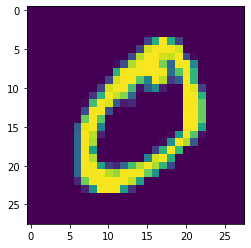

In [13]:
plt.imshow(x_train[1])

In [14]:
#in order to make normalise, just divide by 255
x_train=x_train/255.0
x_test=x_test/255.0

In [35]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling trining!")
            self.model.stop_training = True

In [36]:
callbacks=myCallback()

In [37]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [38]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [39]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2032 - accuracy: 0.9396
Epoch 2/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0807 - accuracy: 0.9751
Epoch 3/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0530 - accuracy: 0.9836
Epoch 4/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0375 - accuracy: 0.9879
Epoch 5/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9912
Reached 99% accuracy so cancelling trining!
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0273 - accuracy: 0.9912


In [40]:
#now we done with training our model.
#next we need to check accuracy of our model on unseen data.

In [41]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.0754 - accuracy: 0.9790


[0.07542904703863897, 0.979]

In [43]:
# here we sees our model does work 97% accurate less than what worked on training data.
#lets predict the image from test images

In [44]:
classification=model.predict(x_test)

In [49]:
classification[1] #model is predicting 2

array([2.7736325e-12, 8.2807355e-06, 9.9999177e-01, 1.1988134e-09,
       1.3441064e-16, 2.1643189e-11, 2.8667482e-11, 1.4202397e-15,
       1.5646252e-08, 1.8704065e-14], dtype=float32)

In [50]:
print(y_test[1]) # cross check whether our model is predicting correct or not

2


In [51]:
# now we sees it is correct prediction made by our model.

In [52]:
classification[2]

array([4.78951243e-08, 9.99862432e-01, 2.66073903e-06, 1.78940383e-07,
       1.97294958e-06, 5.44167563e-07, 2.35887953e-07, 1.57499690e-05,
       1.15978204e-04, 6.41166764e-08], dtype=float32)

In [53]:
print(y_test[2])

1
